In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/GBC')
!pwd

/content
/content/drive/My Drive/Colab Notebooks/GBC


In [4]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

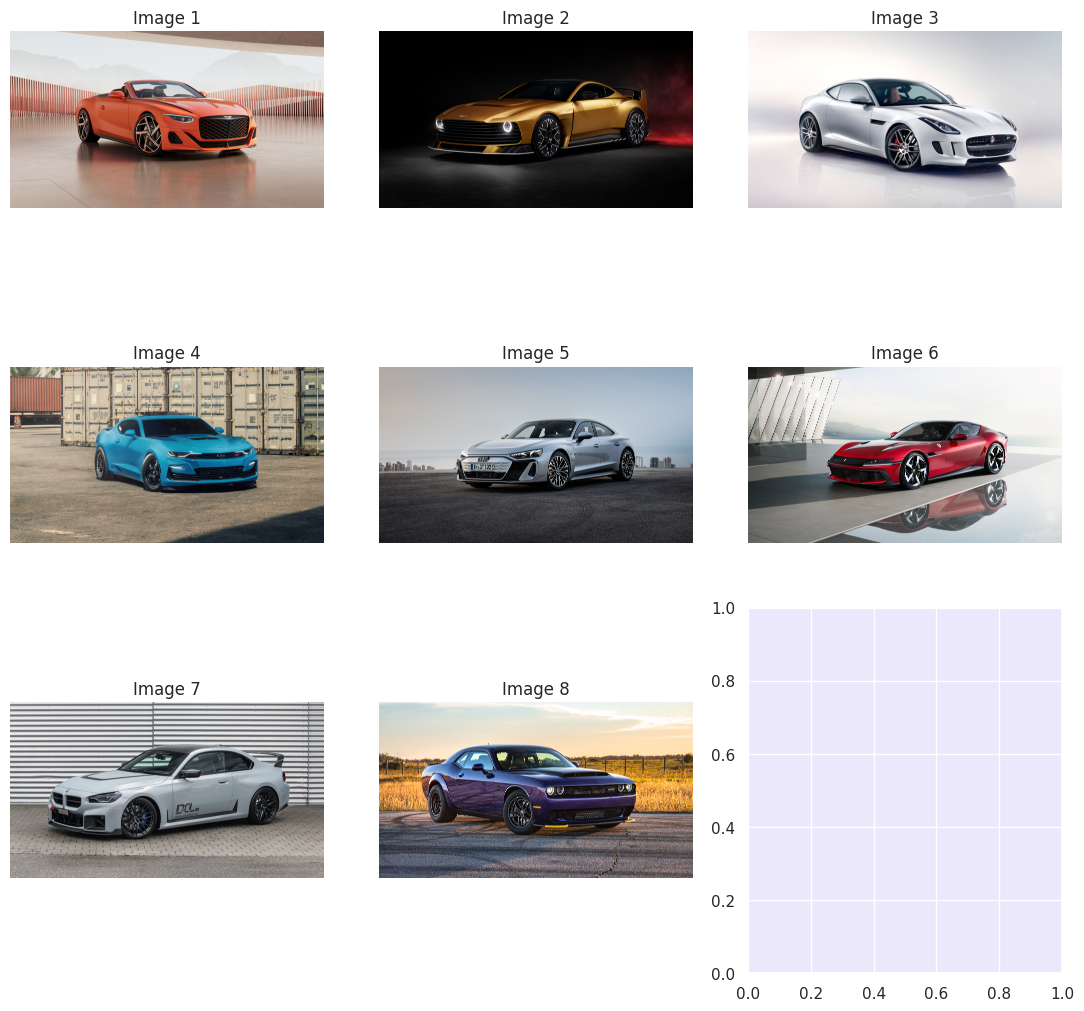

In [6]:
Image_dir = '/content/drive/My Drive/Colab Notebooks/Images'

num_samples = 8
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

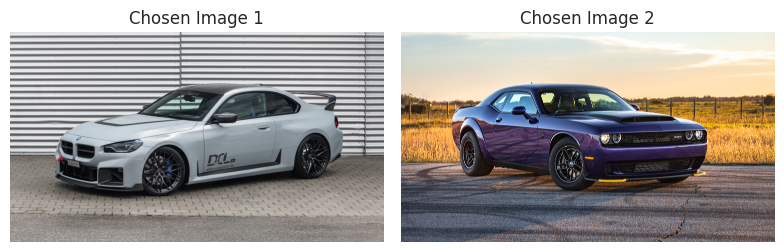

In [10]:
chosen_images = random.sample(rand_images, 2)

# Display the chosen images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i in range(2):
    image = chosen_images[i]
    ax = axes[i]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Chosen Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


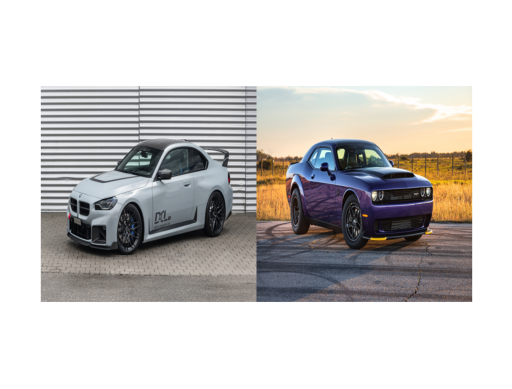

In [11]:
# Create a white background image
background = Image.new('RGB', (800, 600), (255, 255, 255))

# Load and resize the chosen images
image1 = Image.open(os.path.join(Image_dir, chosen_images[0])).resize((350, 350))
image2 = Image.open(os.path.join(Image_dir, chosen_images[1])).resize((350, 350))

# Paste the images onto the background
background.paste(image1, (50, 125))
background.paste(image2, (400, 125))

# Display the composite image
plt.imshow(background)
plt.axis('off')
plt.show()


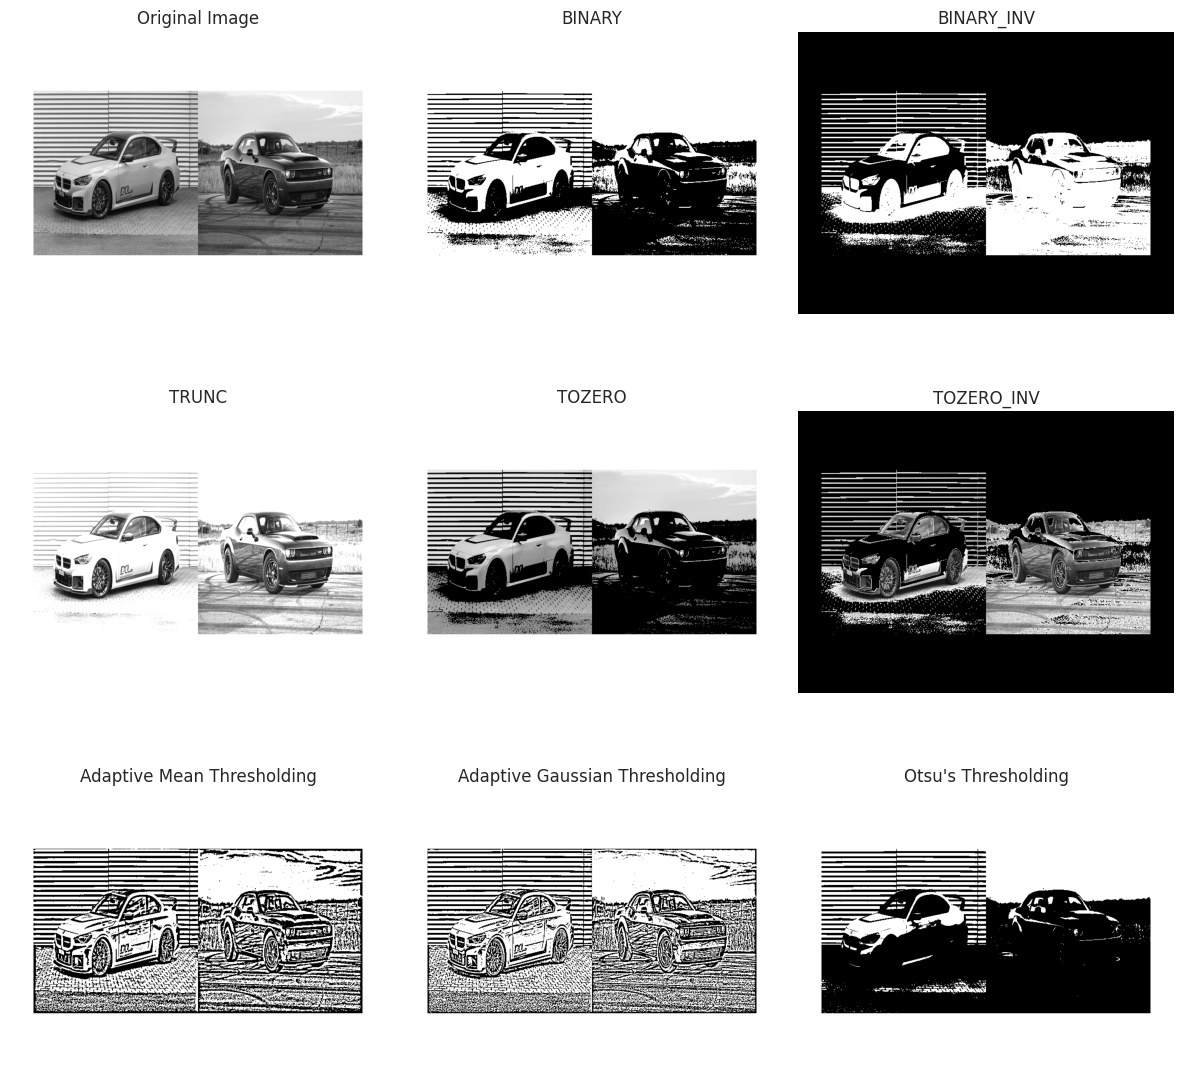

In [12]:
# Load the composite image
composite_image = np.array(background)

# Convert to grayscale
gray_image = cv2.cvtColor(composite_image, cv2.COLOR_BGR2GRAY)

# Apply different thresholding techniques
ret, thresh1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO_INV)

# Adaptive thresholding
thresh6 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh7 = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Otsu's thresholding
ret2, thresh8 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the results
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding', "Otsu's Thresholding"]
images = [gray_image, thresh1, thresh2, thresh3, thresh4, thresh5, thresh6, thresh7, thresh8]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i in range(9):
    ax = axes[i // 3, i % 3]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(titles[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


Red car colors (BGR):
(58.06060606060606, 57.87878787878788, 99.21212121212122)
(68.66666666666666, 78.0, 125.33333333333333)
(82.0, 99.5, 144.0)
(64.45108695652173, 59.95923913043478, 93.16032608695652)
(104.5, 120.75, 180.25)
(73.5, 83.5, 128.0)
(52.08205128205128, 51.49230769230769, 72.3076923076923)
(126.0, 158.5, 220.5)
(58.0, 79.0, 122.0)
(39.104166666666664, 45.75, 81.375)
(103.1207729468599, 107.17874396135265, 143.8550724637681)
(52.21428571428571, 72.0, 110.21428571428571)
(73.0, 104.83333333333333, 164.5)
(84.72307692307692, 101.08571428571429, 137.31208791208792)
(71.83333333333333, 98.41666666666666, 147.5)
(58.0, 63.0, 122.0)
(83.68069584736251, 85.96240179573513, 104.20300224466892)
(33.50909090909091, 42.018181818181816, 90.81818181818181)
(56.850202429149796, 83.87854251012146, 132.41295546558703)
(79.0, 89.0, 127.16666666666666)
(65.5, 81.75, 120.625)
(70.5, 93.0, 141.0)
(65.75, 84.75, 127.25)
(50.0, 68.0, 105.0)
(59.0, 81.0, 123.0)
(62.5, 81.5, 126.0)
(68.02666666666

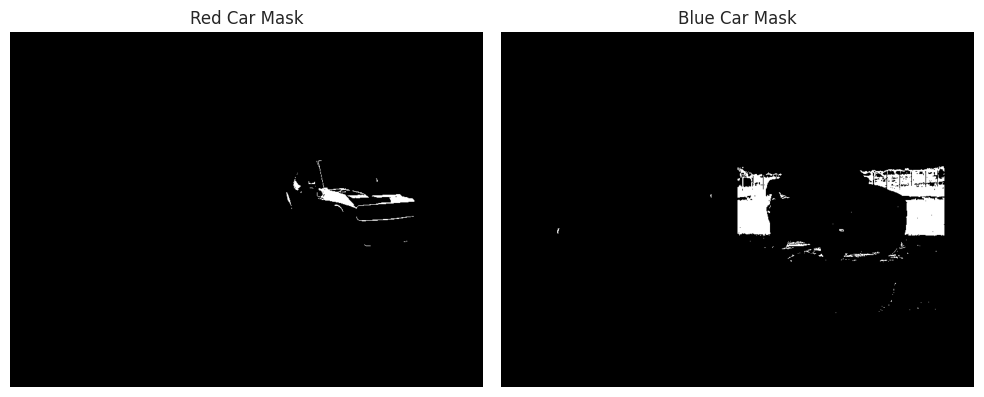

In [13]:
# Load the composite image
composite_image = np.array(background)

# Convert to the HSV color space
hsv_image = cv2.cvtColor(composite_image, cv2.COLOR_BGR2HSV)

# Define color ranges for cars (adjust these ranges based on your image)
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])

# Create masks for red and blue cars
red_mask = cv2.inRange(hsv_image, lower_red, upper_red)
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours in the masks
red_contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
blue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract colors from the contours
red_colors = []
for contour in red_contours:
    x, y, w, h = cv2.boundingRect(contour)
    roi = composite_image[y:y+h, x:x+w]
    mean_color = cv2.mean(roi)[:3]  # Extract BGR values
    red_colors.append(mean_color)

blue_colors = []
for contour in blue_contours:
    x, y, w, h = cv2.boundingRect(contour)
    roi = composite_image[y:y+h, x:x+w]
    mean_color = cv2.mean(roi)[:3]
    blue_colors.append(mean_color)

# Display the extracted colors
print("Red car colors (BGR):")
for color in red_colors:
    print(color)

print("\nBlue car colors (BGR):")
for color in blue_colors:
    print(color)

# Optionally, display the masked regions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(red_mask, cv2.COLOR_GRAY2BGR))
plt.title("Red Car Mask")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(blue_mask, cv2.COLOR_GRAY2BGR))
plt.title("Blue Car Mask")
plt.axis('off')

plt.tight_layout()
plt.show()